In [48]:
import pandas as pd
import numpy as np
import csv
import os 
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import math 
from dateutil import parser
from joblib import load,dump
all_data= []
import matplotlib.pyplot as plt

all_data= pd.read_csv('C:\\Users\\Victor\\Projet_Tennis\\Data\\data_train_co.csv', error_bad_lines=False, sep =',')
data_age = pd.read_csv('C:\\Users\\Victor\\Projet_Tennis\\Data\\data_age.csv', error_bad_lines=False, sep =';')
data_to_invent = pd.read_csv('C:\\Users\\Victor\\Projet_Tennis\\Data\\data_test_co.csv', error_bad_lines=False, sep =',')
from Functions_list import prediction, common_opponents
from sklearn.metrics import classification_report, confusion_matrix

reg_loaded = load('regression_model_saved.joblib')
svm_loaded= load('svc_model_saved.joblib')

4622

Entrez un entier naturel: 300


  0%|                                                                                          | 0/300 [00:00<?, ?it/s]C:\Users\Victor\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:52<00:00,  5.69it/s]

128  lignes n ont pas pu être traités car les noms n étaient pas présents dans all_data
Une régression linéaire renvoie une accuracy de : 0.7267441860465116
Un SVM renvoie une accuracy de : 0.686046511627907
Matrice de confusion pour le modèle SVM pour  172  matchs


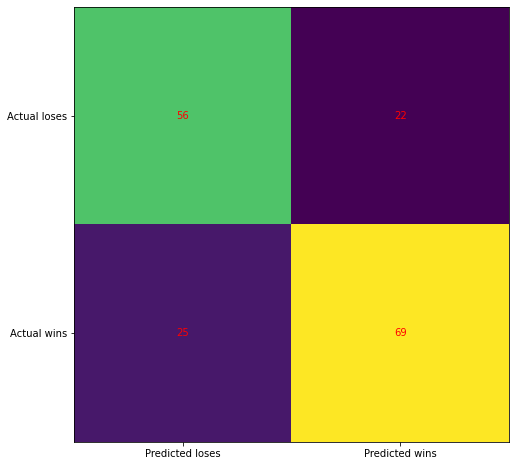

In [53]:
n = input("Entrez un entier naturel: ")
n = int(n)
s = pd.DataFrame([])
for i in tqdm(range(n)):
    
    s= s.append(common_opponents(data_to_invent['player_1_name'].iloc[i], data_to_invent['player_2_name'].iloc[i],data_to_invent['date_tourney'].iloc[i],data_age,all_data,0.22,2,1/2))

i =data_to_invent.player_1_odds[0:n].to_frame().join(data_to_invent.player_2_ods[0:n].to_frame(), lsuffix='_caller', rsuffix='_other')
s.reset_index()
h = i.join(s.reset_index())
h = h.join(data_to_invent['player_1_win'][0:n])
h['diff_odds'] = (h['player_1_odds']-h['player_2_ods'])
h =h.dropna()
c = h[['diff_odds','player_1_fs_prct','player_1_fs_pt_prct','player_1_ss_prct','player_1_def_prct',
     'player_1_bp_prct','player_1_wsp','player_1_serveadv','player_1_aces_pcrt','player_1_df_pcrt','diff_age','player_1_completeness',
      'surface','win_ratio_diff','H2H']]
t = h[['diff_odds','player_1_fs_prct','player_1_fs_pt_prct','player_1_ss_prct','player_1_def_prct',
     'player_1_bp_prct','player_1_wsp','player_1_serveadv','player_1_aces_pcrt','player_1_df_pcrt','diff_age','player_1_completeness',
      'surface','win_ratio_diff','H2H','player_1_win']]

k = n - len(c) 
print(k,' lignes n ont pas pu être traités car les noms n étaient pas présents dans all_data')
print("Une régression linéaire renvoie une accuracy de :", reg_loaded.score(c,h['player_1_win'][0:len(c)]))
print("Un SVM renvoie une accuracy de :", svm_loaded.score(c,t['player_1_win'][0:len(c)]))

print("Matrice de confusion pour le modèle SVM pour ", len(c),' matchs')
cm = confusion_matrix(t['player_1_win'], reg_loaded.predict(c))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted loses', 'Predicted wins'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual loses', 'Actual wins'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


Quel est votre bankroll? 100
Quel est le pourcentage maximum que vous êtes pret à perdre? 0.05


Text(0, 0.5, 'Euros')

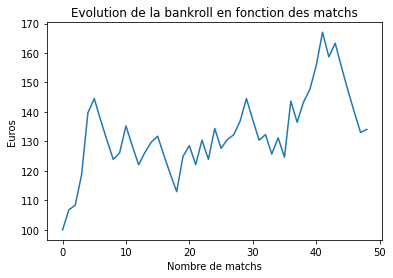

In [54]:
a = h[['player_1_win','player_1_odds','player_2_ods','uncertainty']].join(pd.DataFrame(reg_loaded.predict(c), columns = ['player_1_win_prediction']),lsuffix='_caller', rsuffix='_other')

x = input('Quel est votre bankroll? ')
y = input('Quel est le pourcentage maximum que vous êtes pret à perdre? ')
x,y = int(x),float(y)
lt_bet = [x]
z = x

for i in range(len(a)):
    
        if a['uncertainty'].iloc[i]< 1:
            if a['player_1_win_prediction'].iloc[i] == 1:
                if a['player_1_win'].iloc[i] ==1:
                    x = x + ((x*y)*a['player_1_odds'].iloc[i] -x*y)
                    lt_bet.append(x)
                elif a['player_1_win'].iloc[i] == 0 and x>0 :
                    x = x - (x*y)
                    lt_bet.append(x)
                elif a['player_1_win'].iloc[i] == 0 and x<0 :
                    z = input('Vous avez tout perdu, combien remettez vous?:')
                    y = input('Quel est le pourcentage maximum que vous êtes pret à perdre? ')
                    z = int(z)
                    y = float(y)
                    x = z
                    while z<0:
                        z = input('Vous avez tout perdu, combien remettez vous?:')
                        z = int(z)
                        y = input('Quel est le pourcentage maximum que vous êtes pret à perdre? ')
                        y = float(y)
                    x= x - (x*y)
                    
                    lt_bet.append(x)
            else:
                if a['player_1_win'].iloc[i] == 0:
                    x = x + ((x*y)*a['player_2_ods'].iloc[i] -x*y)
                    lt_bet.append(x)
                elif a['player_1_win'].iloc[i] ==1 and x>0:
                    x = x - (x*y)
                    lt_bet.append(x)
                else:
                    z = input('Vous avez tout perdu, combien remettez vous?:')
                    z = int(z)
                    y = input('Quel est le pourcentage maximum que vous êtes pret à perdre? ')
                    y = float(y)
                    while z<0:
                        z = input('Vous avez tout perdu, combien remettez vous?:')
                        y = input('Quel est le pourcentage maximum que vous êtes pret à perdre? ')
                        z = int(z)
                        y = float(y)
                        x = z
                    x= x - (x*y)
                    lt_bet.append(x)

                   
plt.plot(lt_bet)
plt.title('Evolution de la bankroll en fonction des matchs')
plt.xlabel('Nombre de matchs')
plt.ylabel('Euros')

